In [2]:
import numpy as np
import pandas as pd

In [3]:
# Import the dataset
with open('../Datasets/normalized_heart.csv', 'r') as f:
    data = pd.read_csv(f, sep=',', header=0)
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.950624,0.679881,1.969864,0.762694,-0.255910,2.390484,-1.004171,0.015417,-0.69548,1.085542,-2.270822,-0.713249,-2.145324,1
1,-1.912150,0.679881,1.000921,-0.092585,0.072080,-0.416945,0.897478,1.630774,-0.69548,2.119067,-2.270822,-0.713249,-0.512075,1
2,-1.471723,-1.465992,0.031978,-0.092585,-0.815424,-0.416945,-1.004171,0.975900,-0.69548,0.310399,0.974740,-0.713249,-0.512075,1
3,0.179877,0.679881,0.031978,-0.662770,-0.198030,-0.416945,0.897478,1.237849,-0.69548,-0.206364,0.974740,-0.713249,-0.512075,1
4,0.289984,-1.465992,-0.936965,-0.662770,2.078611,-0.416945,0.897478,0.582975,1.43311,-0.378618,0.974740,-0.713249,-0.512075,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.289984,-1.465992,-0.936965,0.477601,-0.101562,-0.416945,0.897478,-1.163356,1.43311,-0.723126,-0.648041,-0.713249,1.121174,0
299,-1.031296,0.679881,1.969864,-1.232956,0.342190,-0.416945,0.897478,-0.770432,-0.69548,0.138144,-0.648041,-0.713249,1.121174,0
300,1.501157,0.679881,-0.936965,0.705675,-1.027653,2.390484,0.897478,-0.377507,-0.69548,2.032940,-0.648041,1.242538,1.121174,0
301,0.289984,0.679881,-0.936965,-0.092585,-2.223854,-0.416945,0.897478,-1.512623,1.43311,0.138144,-0.648041,0.264644,1.121174,0


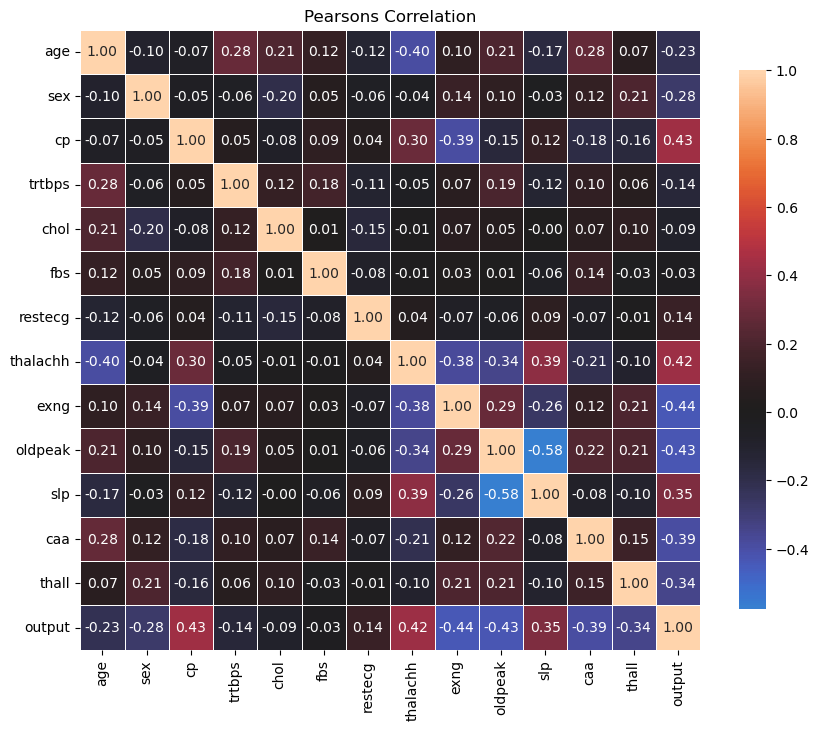

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

def correlation_heatmap(train):
    correlations = train.corr(method='pearson')

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.title("Pearsons Correlation")
    plt.show();
    
correlation_heatmap(data)

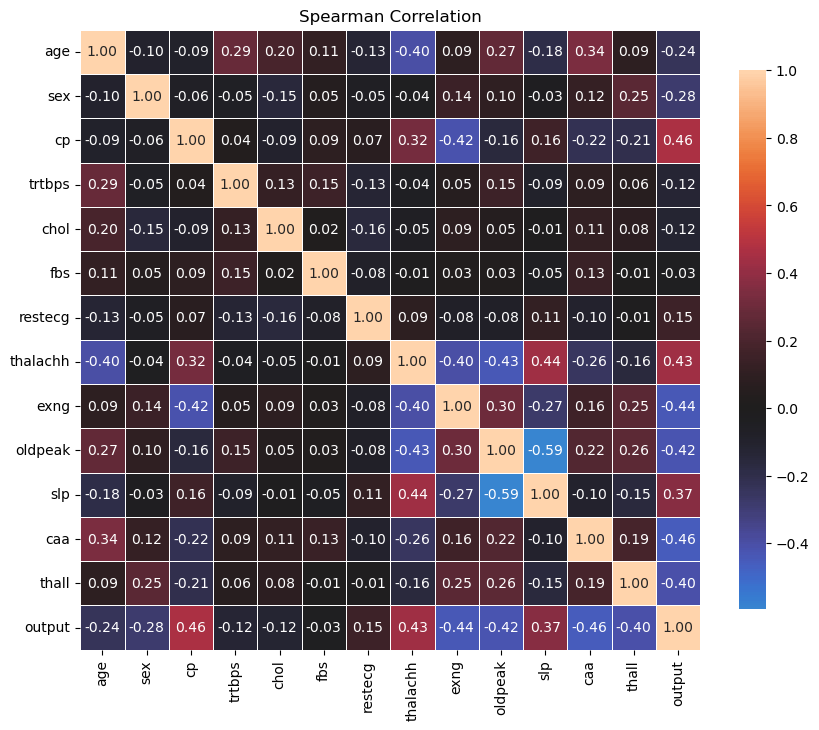

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def correlation_heatmap(train):
    correlations = train.corr(method='spearman')

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.title("Spearman Correlation")
    plt.show();
    
correlation_heatmap(data)

In [6]:
# Remove the four features with the lowest correlation
df = data.drop(['trtbps', 'chol', 'fbs', 'restecg'], axis=1)
df

,age,sex,cp,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.950624,0.679881,1.969864,0.015417,-0.69548,1.085542,-2.270822,-0.713249,-2.145324,1
1,-1.912150,0.679881,1.000921,1.630774,-0.69548,2.119067,-2.270822,-0.713249,-0.512075,1
2,-1.471723,-1.465992,0.031978,0.975900,-0.69548,0.310399,0.974740,-0.713249,-0.512075,1
3,0.179877,0.679881,0.031978,1.237849,-0.69548,-0.206364,0.974740,-0.713249,-0.512075,1
4,0.289984,-1.465992,-0.936965,0.582975,1.43311,-0.378618,0.974740,-0.713249,-0.512075,1
...,...,...,...,...,...,...,...,...,...,...
298,0.289984,-1.465992,-0.936965,-1.163356,1.43311,-0.723126,-0.648041,-0.713249,1.121174,0
299,-1.031296,0.679881,1.969864,-0.770432,-0.69548,0.138144,-0.648041,-0.713249,1.121174,0
300,1.501157,0.679881,-0.936965,-0.377507,-0.69548,2.032940,-0.648041,1.242538,1.121174,0
301,0.289984,0.679881,-0.936965,-1.512623,1.43311,0.138144,-0.648041,0.264644,1.121174,0


In [7]:
# Write the data to a file
with open('../Datasets/normalized_heart_slimmed.csv', 'w') as f:
    df.to_csv(path_or_buf=f, header=True, index=False)

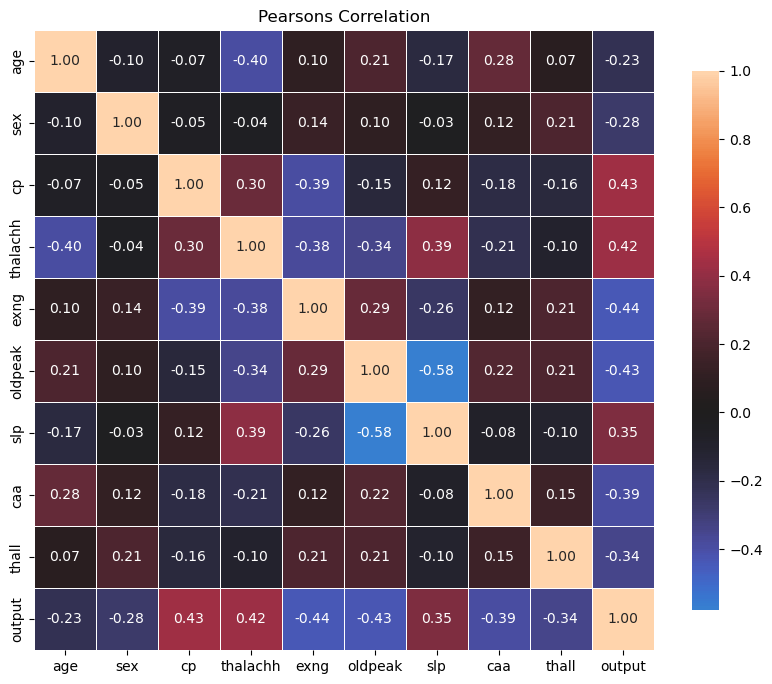

In [8]:
def correlation_heatmap(train):
    correlations = train.corr(method='pearson')

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.title("Pearsons Correlation")
    plt.show();
    
correlation_heatmap(df)